In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

In [2]:
os.environ["DDE_BACKEND"] = 'tensorflow'
import deepxde as dde

Using backend: tensorflow



ModuleNotFoundError: No module named 'tensorflow'

In [40]:
import numpy as np

# Learning a function from a formula

In [41]:
def func(x):
    return x*np.sin(5*x)

In [42]:
geom = dde.geometry.Interval(-1, 1)
geom

In [43]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)
data

In [44]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20]*3 + [1], activation, initializer)
net

FNN(
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [45]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
model

Compiling model...
'compile' took 0.000884 s



In [46]:
losshistory, train_state = model.train(iterations=10000)

Training model...

0         [3.01e-01]    [2.60e-01]    [1.12e+00]    
1000      [2.67e-04]    [2.60e-04]    [3.53e-02]    
2000      [4.21e-05]    [6.60e-05]    [1.78e-02]    
3000      [3.67e-06]    [2.73e-05]    [1.14e-02]    


KeyboardInterrupt: 

In [22]:
losshistory

In [23]:
train_state

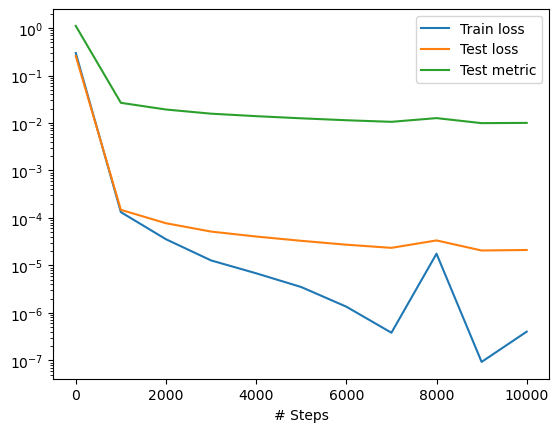

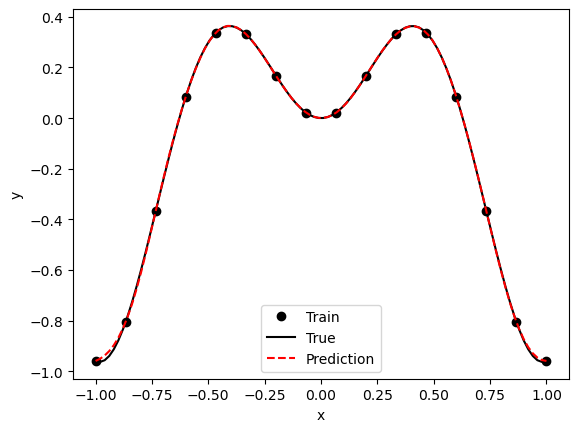

In [24]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

# Learning a function from a dataset

In [30]:
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test

--2023-04-04 13:08:23--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘dataset.train’ not modified on server. Omitting download.

--2023-04-04 13:08:24--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25824 (25K) [text/plain]
Saving to: ‘dataset.test’

dataset.test        100%[===================>]  25.22K  --.-KB/s    in 0.02s   

Last-modified

In [31]:
fname_train = 'dataset.train'
fname_test = 'dataset.test'

In [33]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

In [36]:
layer_size = [1] + [50]*3 + [1]
activation = 'tanh'
initializer = 'Glorot normal'
net = dde.nn.FNN(layer_size, activation, initializer)

In [37]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000575 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.92e-01]    [4.09e-01]    [8.96e-01]    
1000      [7.20e-03]    [7.32e-03]    [1.20e-01]    
2000      [5.64e-03]    [6.02e-03]    [1.09e-01]    
3000      [5.13e-03]    [5.62e-03]    [1.05e-01]    


KeyboardInterrupt: 